In [1]:
# ***************************************************************************************************
# Here you will find a simple version of a Variational Hybrid Quantum-Classical Algorithm based on a
# Parameterized Quantum Circuit (PQC).
# ***************************************************************************************************

# ***************************************************************************************************
# Code from:
# Zickert, F. (2021). Chapter 3: The Qubit and Quantum States
# In F. Zickert, Hands-On Quantum Machine Learning With Python: Volume 1: Get Started, PyQML, 2021. 
# Available on https://www.pyqml.com/
# ***************************************************************************************************

# ***************************************************************************************************
# Modifications have been made by Gustavo Patino.
# Engineering School
# University of Antioquia.
# Medellin, Colombia
# September, 2022.
# ***************************************************************************************************

In [2]:
# Listing 3.1 Verify Qiskit version
import qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
from math import sqrt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix 
from qiskit_textbook.tools import vector2latex

In [4]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [5]:
# Importing the Qiskit lab. Drive:
import sys
sys.path.insert(0, '..')

In [6]:
# Listing 3.16: Load the data
with open('data/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

with open('data/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [7]:
# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('\nThe precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [8]:
## The Random PQC

In [9]:
# Listing 3.20: Pre‐processing template
def pre_process_random(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    
#   vector2latex(quantum_state, pretext="|\\psi\\rangle =")    
    
    return quantum_state

In [10]:
# Listing 3.21: The parameterized quantum circuit (PQC)
def pqc(backend, quantum_state):
    """
    backend -- a qiskit backend to run the quantum circuit at
    quantum_state -- a valid quantum state vector  
    returns the counts of the measurement
    """

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(quantum_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)
    
    print('Salida counts =', counts)

    return counts

In [11]:
# Listing 3.22: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    
    Prediction = list(map(lambda item: item[0], counts.items()))[0]
    
    print('Given the former angle theta and quantum state, the new prediction is:')
    print('Prediction =', Prediction)
    print('int(Prediction) =', int(Prediction), '\n')
        
    return int(Prediction)

In [12]:
# Listing 3.23: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

classifier_report(
    "Random PQC",
    run,
    lambda passenger: post_process(pqc(backend, pre_process_random(passenger))),
    train_input,
    train_labels)

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Salida counts = {'1': 1}
Given the former angle theta and quantum sta

In [13]:
################################################
## Passengers Data Analysis
### 1. Data Correlations
################################################

In [14]:
df = pd.DataFrame(train_input,columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
print (df)

     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       0.5  1.0  0.334004  0.000  0.000000  0.025374       1.0
1       0.0  1.0  0.220910  0.125  0.000000  0.212559       0.0
2       1.0  0.0  0.367204  0.125  0.000000  0.030254       0.5
3       1.0  0.0  0.367204  0.125  0.000000  0.028221       0.0
4       1.0  0.0  0.367204  0.250  0.000000  0.045381       0.5
..      ...  ...       ...    ...       ...       ...       ...
706     1.0  1.0  0.447097  0.000  0.000000  0.015412       1.0
707     1.0  1.0  0.195778  0.500  0.166667  0.077465       1.0
708     0.5  1.0  0.585323  0.000  0.000000  0.029278       1.0
709     1.0  0.0  0.170646  0.125  0.000000  0.021942       0.0
710     1.0  0.0  0.367204  0.000  0.333333  0.043640       0.0

[711 rows x 7 columns]


In [15]:
FareRanking = df["Fare"].rank()
print(FareRanking)

0      312.5
1      668.5
2      365.0
3      347.0
4      424.5
       ...  
706    154.0
707    568.5
708    354.0
709    284.5
710    418.5
Name: Fare, Length: 711, dtype: float64


In [16]:
max(df["Age"])

1.0

In [17]:
corrMatrix = df.corr(method = "pearson")
print(corrMatrix)

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.130037 -0.336032  0.083410  0.034231 -0.548106  0.175709
Sex       0.130037  1.000000  0.079555 -0.126995 -0.254039 -0.192483  0.109315
Age      -0.336032  0.079555  1.000000 -0.216866 -0.146591  0.086596 -0.038868
SibSp     0.083410 -0.126995 -0.216866  1.000000  0.395434  0.148095  0.052227
Parch     0.034231 -0.254039 -0.146591  0.395434  1.000000  0.204681  0.073402
Fare     -0.548106 -0.192483  0.086596  0.148095  0.204681  1.000000 -0.237241
Embarked  0.175709  0.109315 -0.038868  0.052227  0.073402 -0.237241  1.000000


In [18]:
corrSpearMatrix= df.corr(method = "spearman")
print(corrSpearMatrix)

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.131815 -0.321516 -0.043317 -0.013522 -0.705078  0.108566
Sex       0.131815  1.000000  0.054389 -0.196226 -0.263718 -0.280680  0.114505
Age      -0.321516  0.054389  1.000000 -0.117310 -0.178887  0.139929 -0.043459
SibSp    -0.043317 -0.196226 -0.117310  1.000000  0.448528  0.453469 -0.022274
Parch    -0.013522 -0.263718 -0.178887  0.448528  1.000000  0.417761  0.053750
Fare     -0.705078 -0.280680  0.139929  0.453469  0.417761  1.000000 -0.098183
Embarked  0.108566  0.114505 -0.043459 -0.022274  0.053750 -0.098183  1.000000


In [19]:
def display_correlation(dfr, my_meth):
    r = dfr.corr(method=my_meth)
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(dfr.corr(method=my_meth), vmin=-1, 
                      vmax=1, annot=True)
    plt.title(my_meth +" correlation")
    return(r)

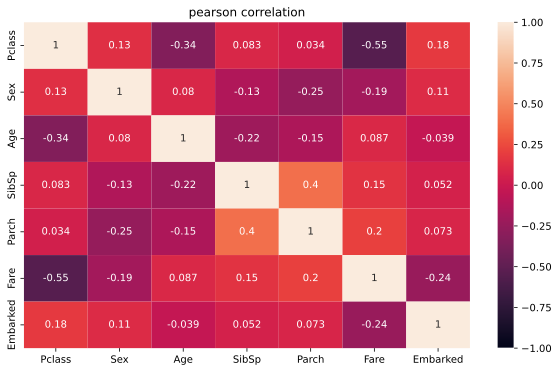

In [20]:
person_map=display_correlation(df, "pearson")

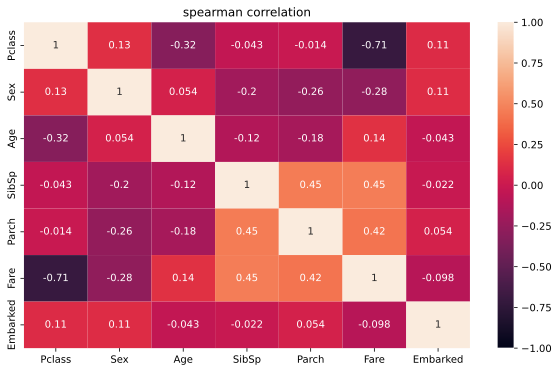

In [21]:
spearman_map=display_correlation(df, "spearman")

In [22]:
################################################
### 2. Data Ranking
################################################

In [23]:
dfrank=df.rank()
dfrank

#dfrank.shape

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,252.0,481.0,260.5,238.5,269.5,312.5,454.5
1,89.5,481.0,97.5,564.0,269.5,668.5,69.0
2,518.5,125.5,375.0,564.0,269.5,365.0,167.5
3,518.5,125.5,375.0,564.0,269.5,347.0,69.0
4,518.5,125.5,375.0,663.5,269.5,424.5,167.5
...,...,...,...,...,...,...,...
706,518.5,481.0,541.0,238.5,269.5,154.0,454.5
707,518.5,481.0,74.0,696.0,585.5,568.5,454.5
708,252.0,481.0,635.0,238.5,269.5,354.0,454.5
709,518.5,125.5,59.5,564.0,269.5,284.5,69.0


In [24]:
train_label_series=pd.Series(train_labels)
print(train_label_series)

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
706    0.0
707    0.0
708    0.0
709    1.0
710    1.0
Length: 711, dtype: float64


In [25]:
FareRanking.corr(train_label_series, method='spearman')

0.3269395039569518

In [26]:
dfrank["Sex"].corr(train_label_series, method='spearman')

-0.5441105029383182

In [27]:
################################################
## Variational Hybrid Quantum-Classical Algorithm with Passenger Information
################################################

In [28]:
# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    """
    feature -- the single value of a passenger's feature
    weight -- the overall weight of this feature
    returns the weighted feature 
    """
    return feature*weight

In [29]:
# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    """
    features -- list of the features of a passenger
    weights -- list of all features' weights
    """
    return reduce(lambda result, data: result + weigh_feature(*data), zip(features, weights),0) #result = result + weigh_feature(features, weights), starting at 0.

In [30]:
# separate the training data into a list of the columns
columns = [list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]
#columns

In [31]:
# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations

[-0.3483505110773147,
 -0.5441105029383182,
 -0.01664108694033656,
 0.1078457168830655,
 0.12308463286494013,
 0.3269395039569518,
 -0.1916827740135955]

In [32]:
dcorr = pd.DataFrame(correlations,index =['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'], columns = ['Ranking Correlation = Feature Weight'])
dcorr

,Ranking Correlation = Feature Weight
Pclass,-0.348351
Sex,-0.544111
Age,-0.016641
SibSp,0.107846
Parch,0.123085
Fare,0.326940
Embarked,-0.191683


In [33]:
# Listing 3.27: The weighting pre‐processing
from math import pi, sin, cos

def get_state (theta):
    """returns a valid state vector from angle theta"""
    return [cos(theta/2), sin(theta/2)]

In [34]:
def pre_process_weighted(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """

    # caluclate the overall probability
    mu = get_overall_probability(passenger, correlations)
    print('Overall Probability =', mu)
        
    # theta between 0 (|0>) and pi (|1>)
    quantum_state = get_state((1-mu)*pi)
    
    vector2latex(quantum_state, pretext="|\\psi\\rangle =")  

    return quantum_state

In [35]:
backend = Aer.get_backend('statevector_simulator') 

In [36]:
# Listing 3.28: Run the PQC with the weighted pre‐processing

classifier_report("Variational Hybrid Quantum Circuit with Data Train", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    train_input,
    train_labels)

Overall Probability = -0.9072308497187229


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.46481214951206384


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4269306339310004


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.33175400091689317


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4085043078745657


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.04904214788703966


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8969976592085727


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.48788645159775984


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9071533168759616


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.10087132455966905


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3425911095499906


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0879568438394602


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8548478604404612


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9899779776556682


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3637476810455595


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0597743680716945


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4430491287247045


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.45190164111247155


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9885020449125361


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4425529050973378


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.070841467133318


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4435606088442612


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.065319811803422


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.06464877409010415


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8911002791336133


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0838487186224766


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0829904254891745


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6670715792043456


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0895835892699668


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8968645747940646


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3279347402686018


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.505261453240863


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0721432469965084


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.35288715627025447


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9006078767313501


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.2798193036266502


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9107082110451714


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.37098904796293597


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5259451829007542


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.72096516559839


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4049305309931181


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0826829123532653


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3645841267324324


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9709571682745497


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4855971981466821


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0890149249079806


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.540211678805383


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.30619856248149263


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.531250867558171


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085158627430574


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9790019109624959


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.49754919488995764


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5131730002075656


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.081339381561858


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0166263463784608


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5389260684940957


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8569017720995347


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5387478988533554


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.081955157256725


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36952526801090835


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5382579618757235


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8956099062637551


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9475772539794087


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9136033435075093


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.084454205441202


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0873817653452573


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.07734454747363155


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.06423129950762298


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0100690623507056


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9077833414788266


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.89395842100813


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9071533168759616


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0815386492259789


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0873107236344115


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9063944040318501


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4974586136719975


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4916150762550471


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0847848357176866


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085290651128075


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.09367234486872558


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5470012778957121


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8939611012104621


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0665744803337311


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9857564605857352


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36706103635133397


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.18678070207707742


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0669614506003429


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0892576583130087


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9845218514797017


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.893994865210646


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.13389124742573458


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7281727565330587


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.36500234957586886


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3448986619781129


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9710411368693186


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.29459835460443295


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0902190524800284


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.007954948439565356


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7238235375711839


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9178179993835911


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.984710903477144


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3285902327733026


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9868725194573742


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.916079205839945


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9063060620418495


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.31820038991526006


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3355307492183003


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7324968524225215


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.27480062950541273


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.891942149295999


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5378609122082209


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.10202832066072956


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5172287175013452


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6923238553499037


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3432257706043671


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0838570635339768


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6928054376902608


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4689363022912371


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0857354207374672


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0857027641437988


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5223891348903619


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8451913116160163


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.643276349991935


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0881409073413197


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.49905510757443045


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0842912399627231


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0820829380914558


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.89395842100813


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5254257547064288


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0848724282846387


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894807363087309


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.35315159104554045


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9063944040318501


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8930118628845264


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9904425331357105


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0856104722573205


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0768001432698089


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.14286531099147404


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5007044510093474


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0405419951523278


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7099643421045057


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4544109781730903


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.445367616982422


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4452745118585537


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3661794852634167


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.1123603500803888


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5394550010450593


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.04018224333090834


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.985617850927065


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8942352113796342


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0825233765001667


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7262491549616297


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.97598674831537


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.89395842100813


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.23111900494359122


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8969976592085727


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0841920989608618


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0850775229455583


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4453330296094702


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0467020427232692


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9086170968279892


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4269306339310004


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0837162056374758


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6069195407410812


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.15121702002731627


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.084266941465913


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.989483416511063


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.07937178237313999


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8946534342230706


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0836815740955685


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44951486827803844


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0829904254891745


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0897750322936848


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.042177988916781


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.15059736130029183


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3509099702926336


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8966347597187039


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34453448487087174


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.35288715627025447


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0542020387806883


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0840359825977657


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9096626539365802


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.0966867488774621


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0945686414078943


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44211696152597246


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4689363022912371


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.6339117249535144


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9086946296707505


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6794351386590192


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0810013818988933


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0857088739715115


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5374290478629613


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7139017542023063


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9063944040318501


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.0795074648479726


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3178588658384016


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.36332945820212303


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0859179853932297


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.08331024661842


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5367552376414158


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.49681281744815353


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4857197271648634


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7294274250633681


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8753146284830986


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0829193837783289


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7263944520421086


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.008576770147803857


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7195689308675071


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0828229128434212


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.06803682334571874


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5122928339191871


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9876709596303272


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.13733517267671333


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0831809031232509


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.695675117823568


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.087910697896221


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9055579583449771


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.03929249115476996


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7419039503012876


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.08527822077416765


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5393165632153414


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.08146064763612428


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8940359437155133


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7147923734698238


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7226253790128088


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9072308497187229


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9697024997442403


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4945923419062475


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9893331940090861


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.1415396765879246


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0828584017916736


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9078581839838777


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0696285495312257


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.048136074006746035


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.0393538796479965


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0834724626738503


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.08104467374688581


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5031008432786512


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3181455101028814


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8564072322127527


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.042081307077457414


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.084029872770053


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0828920237749835


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6537648456856919


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.916079205839945


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4620696305227745


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.532531330381408


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5312683169395983


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0883289207396574


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7148466696157934


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085192249413884


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8875453849644035


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6990786263424098


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0831011351967017


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5287827917197039


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.045208999456106874


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8598760844521842


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.35968809085500075


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0318118595332093


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0864742779475387


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5303152707340585


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0827102723566107


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8939611012104621


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.3197084309939355


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5403250687152421


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5330301763327678


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.083853417942003


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.729205192410924


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44510967941513246


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9699834022998528


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0681801277408571


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8939611012104621


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.083147281139941


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.07899422276884582


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8377266893335555


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0409266730121534


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.02880167229582178


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0917669953736275


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5385997694182924


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.15112949432468492


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.36332945820212303


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0854340174292703


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0845312931654194


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5228890594896105


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0578923652762304


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8923630523417675


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0875032842000234


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5846782729491392


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8597123797267756


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.05980679597213225


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0881995772444883


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7278359412763087


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9071208894342444


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0570035116661536


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.083390014544969


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.43601413454498034


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9562021294586702


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.30608347004348146


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.17642376185730815


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0830675132133918


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8665120325378091


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.140214332618469


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.020781072792606


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.30966361859856145


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7224613729921348


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8826842934970643


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.909453542514862


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0852509193170525


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0847271312041598


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.31786967498564067


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0871540201358971


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5371982792527599


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8577758194782742


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0862378065224751


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.086963542501821


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0663157933433933


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4269184564701258


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.916079205839945


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0830656462484494


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.42062218251740946


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.49933519873979904


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5413259756767115


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7227596479294758


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0821758272487307


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0840578300441948


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0832260836768484


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8850360479037849


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8935330346094283


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0404845197907522


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0915839724139629


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4269306339310004


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.083519358040138


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8541070065738523


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6930916023930151


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7258725308941583


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0856279216387477


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8858209648228378


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5382681737521662


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0893744778482486


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.06771701588094989


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9097401867793418


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5171165221330789


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9092444310931438


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7270834425644139


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8525151334101242


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.031740615400558364


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.12800022525079258


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7221215045170819


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.42141069341379456


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.2317463392087459


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0848724282846387


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894781199207401


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36427045959985505


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7087204928568136


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.15114639204181324


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7115040152391576


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.37367314185133393


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8969976592085727


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8667729107784183


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.081520167590589


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9014443224182231


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7288000907982135


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0943024208963


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.35288715627025447


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0856902401838697


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7438607956018028


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8864998278558125


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9066035154535683


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.013596929929780576


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.084936242625878


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8673685047385928


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0856279216387477


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8966554633723463


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0218541319214165


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.05228631526155298


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7332900615204383


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085995073117447


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.724961242702234


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8954794830505054


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.22440207194438266


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.1321641110166617


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.6939853287326938


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4903764949217567


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8961270579326956


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9125526419608474


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.16810012913912725


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.2682462447517665


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9068126268752865


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7099967796816009


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9917379753588458


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.49500452103333864


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.15740913966556855


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0829904254891745


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.331756617304884


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44553635820334525


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7123502295310746


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36416590388899595


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9086946296707505


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.06279554502954171


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8989349853576043


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8901087677612176


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0856902401838697


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8656170751035057


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0834857360568282


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8923603721394354


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.47667056985428785


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0438639245215537


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5406908836354747


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8937195963806039


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.42733667931356223


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0871540201358971


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7323549849674234


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.1426688846959627


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5330788246174398


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8939611012104621


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9068126268752865


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7317276507022685


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.32002324576851293


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.28736189000000634


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.692312437358948


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7304729821719593


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8645480308883484


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0838487186224766


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6978239578121004


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.079741527811537


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4661676708341057


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9086946296707505


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0828920237749835


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.692333015111231


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6423832990848449


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6727380624542655


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.07054915815967


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.14623771148614223


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5378347467464684


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9790790803747074


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0880206581806995


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7155501687720414


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34138586902641066


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0671522390302661


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6710402473072397


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5044594272421612


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0755369006760482


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.30045347441254333


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.18529485871202742


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4932789264730706


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.11492734977845062


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0832260836768484


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085192249413884


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.04840007425486843


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.15224967492175448


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5646706293673939


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.48392716294839283


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4118107239647396


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0848942757310678


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.40432874903245497


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8879527986606011


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.40502759638280783


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8890632106526264


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5223891348903619


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5306328537295366


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5003899914468595


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.14928377403816237


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8599214911484938


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.20409707788861098


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7281727565330587


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7313094278588321


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.696076442949876


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.540886721674215


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7189064788229249


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.09764546188137191


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9045809937439966


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7246178623638488


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0781731921486504


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.061728896809577966


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.082913121798364


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.082351316687139


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.084068487039182


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.72703293258975


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3662570181061782


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8681264121641246


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8869180506992489


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.088029078244753


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085292896347241


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.916079205839945


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0828743553769833


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.53260468722572


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7253122215790506


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9122387146927213


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6121473262840371


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5361445931992618


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9900364954065847


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5410069039705145


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34985059827214393


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.41209162652035214


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.05289756232968856


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0836177597543293


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8635449778253144


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.364083900878659


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8598933329089475


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0834351950985666


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0820829380914558


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6974702987329517


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8934526816966211


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36656528066513605


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8933987656927613


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5216275317085401


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5407619253463205


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.2703199422407497


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5396977344500875


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3202101330299607


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0828451284086957


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6702621755480042


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.512008388479947


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.406909593801998


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44251489958341794


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.056664981596713


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3215065721651875


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085292896347241


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.05184059180666484


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0701940002344243


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34071643354374836


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.13820188080920656


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8180775985815281


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9526148108128839


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.42545467651809815


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.11154847898322298


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.1127865651633949


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.06343637206791775


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4730831199527217


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3651339281548256


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9097401867793418


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0846633168629203


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0848989750505942


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.026659931791706077


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9980113180103926


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4260102196493586


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7253600823349802


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3150509399946156


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5325875390988173


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0787759987650438


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0806184958514569


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.084029872770053


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.539919369831735


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3343428043835134


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.6003770148153353


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.14058340533512947


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.31560187678845736


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0829786509522936


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0890812034849588


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0830640835880112


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9655211963521128


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0826897716040262


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0881198093179392


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0840997969390052


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5026164928755559


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5270399010244529


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4505043951974591


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3311029624605841


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.89395842100813


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9878802232042976


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9890154659467547


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34678876945142173


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.6252064952781213


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.14671423611390186


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.10350261905526101


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.15154771716812138


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.17009590894034426


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0928313384221127


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8742279928696401


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9074399611404413


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8751055170613804


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0847848357176866


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9081988739845528


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0852968051247431


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7436516841800846


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.082264689509829


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9169815536967183


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0856279216387477


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3624930125152501


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4720335830948334


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.04560317304579592


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.337688587131005


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.30642086015111153


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9068126268752865


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5346972871036415


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0834697824715183


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3391199396413155


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.03929249115476996


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0644440794240708


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.1397413247919075


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4530235956923756


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.04079361034627668


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0836177597543293


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7440699070235213


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.084454205441202


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.30370396663503624


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0839375808835747


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3286947884841618


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5396002981255381


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36583879526274177


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9845017920554258


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0845757242959684


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.13903033952730587


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0868759499348688


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.052640126492953666


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8901087677612176


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.05111127569089845


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.33967087643515725


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.06195861398925277


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9078581839838777


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9872202405377628


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3824429759110829


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5410069039705145


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8404070755178263


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4672132279426968


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9091128525141872


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34176199065233953


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0881198093179392


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0479816643441835


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7134061162251795


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.31525224645263145


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8893452184655944


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5395843445402282


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.15499811572146108


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9161451080098453


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4410891251453102


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.442504242588431


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6771628524647056


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.15112927530811213


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.28865442586932305


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.842707301156727


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894169219674915


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5245863245127197


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.09948476434600446


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.07911331251148848


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9078581839838777


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8741629874150765


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7277432042712857


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4856985843677094


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8940332635131812


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7218880844631752


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.044430284912209767


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.042243683377006


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36471570531138914


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9104990996234532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3254520331989573


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5003471338650802


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0850948130893348


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.47764815558767776


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0820829380914558


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8890091649164311


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0855880376754732


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9090353196714256


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8548478604404612


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0838268711760475


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4962894182928998


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7224405762232788


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.083519358040138


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.906525982610807


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9526929881140621


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.070841467133318


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34636786640565326


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3338921540983598


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.6759106361468705


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0846572070352078


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0640321286959773


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0534404355988667


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0697001885128679


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3094545071768432


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.28954314941162557


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7175098464271408


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0865453196583845


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9876384633811992


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9101367913283


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3305357127747584


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.29916517161438577


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 


The precision score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.72
The recall score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.59
The specificity score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.86
The npv score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.77
The information level is: 0.73


In [37]:
# Listing 3.29: Test the PQC‐based classifier on data it has not seen before

classifier_report("Variational HQC with Data Test", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    test_input,
    test_labels)

Overall Probability = -0.36346103678107977


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5243772130910014


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0838207613483348


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3035696977183692


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9103675210444964


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894754397184081


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44354979969702213


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.2973981225920528


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7192498591613101


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44375891111874033


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0870204975922992


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.539937038229735


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0905245906676988


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.724961242702234


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0849831379921657


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5405341801369603


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.084517206545052


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9710411368693186


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.89395842100813


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8939611012104621


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0568356852153142


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0830122729356038


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4357899119159483


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0854811287621513


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8960281291071917


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0847265440687417


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36355280839646087


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.1452949522688577


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4454340477116522


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9079897625628344


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.32228873188220963


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0710000375967745


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5053382939835745


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.2683210872568177


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9459043626056629


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44535695998743496


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.1443447911097982


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0810013818988933


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.054695104129176


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.082264689509829


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8929903866069222


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36952526801090835


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.948622811088


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0542020387806883


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0824401789482372


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5213688447182021


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9897514168525225


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0843558037270111


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3654205724193053


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.086800577023342


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0640321286959773


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0892837467750625


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.518869796533725


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0417966636826372


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.916079205839945


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9968612051909423


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5214606163335832


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.893745946825352


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.34176199065233953


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3624930125152501


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.89395842100813


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.030143478098420187


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8505198982590771


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.08331024661842


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5266352426831407


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0862378065224751


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3415528792306213


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.36262459109420686


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0857555503212264


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3444804391346765


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9089481722230177


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5249506971569003


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44349199652326526


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.086028695100757


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3244341320692427


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9121395635554819


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9063060620418495


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4961300889058129


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7317276507022685


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4839603266278008


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.1421814542038241


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4689363022912371


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8926740392720127


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9120404124182422


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0889317273560508


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.29424352066039205


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9080672954055959


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0856902401838697


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.06810368538779052


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.37057347683451713


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.532531330381408


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0437929447779033


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.052688450907970336


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.42629112220497106


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.4453649367800899


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9053488469232589


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.14329621896111738


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.084174052308638


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8972771707521459


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6970080898775106


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5272788079673688


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.06649963782868


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9479954768228451


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8640942591032199


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8969976592085727


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9029081023702508


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.09902486568616374


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8935330346094283


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9116221895748058


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.083390014544969


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6857886155088149


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6783657281721622


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.2794494846900582


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0489537333357448


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5403702492688396


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0880827577092487


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0855768502740104


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.36500234957586886


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.05425519406297881


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9899605282742409


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0488130407455387


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.16998460196202075


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.086028695100757


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4452745118585537


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3498479180698119


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0854364786150297


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7394154100095249


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.3206205509096948


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.085215808623024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0854110524409475


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.317934529869075


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5414158063774308


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7264582663833481


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.44283723260697355


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.8410344097829812


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.1850857472903092


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.054695104129176


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9124586352616788


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0624686493706796


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.6617563011991059


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.053858658442303


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.28865442586932305


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9098717653582986


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0841096406966024


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = 0.05222190364951721


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7277129349136573


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0840421365944337


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.916079205839945


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.3205075864416795


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.6955237321731997


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.084459502031525


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.4452745118585537


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = 0.13649872698984042


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.866741170473438


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.8573199949429712


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0842450940194839


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.44530641902917345


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0542020387806883


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0851174069088327


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.1377673385231719


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.49850039200085033


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0130468052295554


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.7271158700061311


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5415643809310381


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.5343988683022809


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.10880751199913435


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.7419039503012876


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.5444098608250574


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -0.9103675210444964


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.9894674629257532


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0868280891789392


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -1.0844019496702504


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 

Overall Probability = -0.061801542577826885


<IPython.core.display.Math object>

Salida counts = {'1': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
int(Prediction) = 1 

Overall Probability = -1.0837392786090954


<IPython.core.display.Math object>

Salida counts = {'0': 1}
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
int(Prediction) = 0 


The precision score of the Variational HQC with Data Test classifier is 0.70
The recall score of the Variational HQC with Data Test classifier is 0.65
The specificity score of the Variational HQC with Data Test classifier is 0.83
The npv score of the Variational HQC with Data Test classifier is 0.79
The information level is: 0.74


In [38]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright